$X,Y$ - учебный набор, частично размеченный;   
$X^ℓ = \lbrace x_1,\ldots, x_ℓ \rbrace$, $\lbrace y_1, \ldots, y_ℓ \rbrace$ - размеченная часть выборки (labeled data);    
$X^k = \lbrace x_{ℓ+1},\ldots, x_{ℓ+k} \rbrace$ - неразмеченная часть выборки (unlabeled data);	

$b_y(x)$ - оценка принадлежности объекта $x$ к классу $y$

классификатор - выбираем для объекта $x$ класс $y$ с наилучшей оценкой $b$ ;

$$a(x) = \arg \max_{у\in Y} b_y(x)$$

оценка "степень доверия" классификации,  
насколько оценка класса-победителя лучше оценок остальных классов


$$ y = a(b(x)) $$
$$ M(x|b) = \max_{y\in Y} b_y(x) - \max_{q\in Y\setminus y}  b_q(x) $$

Алгоритм self-training — обёртка (wrapper) над произвольным методом обучения классификатора:
    

    
Z := Xℓ ;

пока |Z| < ℓ+k:  
- $a(b((Z))$ ; обучить классификатор $a$ на размеченных данных $Z$
- $X_∆ := \lbrace x \in X^k\setminus Z\ |\ M(x|b) > M_0 \rbrace$ ; оценить неразмеченные и выбрать "надёжные"
- $y_∆ := \lbrace  a(x) | x \in X_∆ \rbrace $  ; доразметить "надёжные"
- $Z := Z \cup X_∆$ ; добавить новые к размеченным  


In [1]:
import numpy as np
from numpy import random as rng

In [41]:
# from sklearn.datasets import load_iris

# data = load_iris()

# X = data['data']
# target = data['target']

# random_unlabeled_points = rng.rand(len(target))<.7
# len(target),random_unlabeled_points.sum()

In [42]:
from sklearn.datasets import make_moons

X,target = make_moons(n_samples=500,noise=.1)

random_unlabeled_points = rng.rand(len(target))<.97
len(target),random_unlabeled_points.sum()

(500, 484)

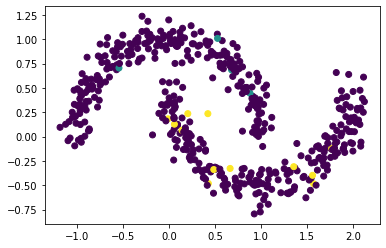

In [43]:
from matplotlib import pyplot as plt

target_partial = target.copy()
target_partial[random_unlabeled_points] = -1
plt.scatter(X[:,0],X[:,1],c=target_partial)

----

In [45]:
from sklearn.svm import SVC

X_partial = X[~random_unlabeled_points]
target_partial = target[~random_unlabeled_points]

model = SVC(probability=True).fit(X_partial,target_partial)

X_partial.shape,target_partial.shape

((16, 2), (16,))

In [46]:
from sklearn.metrics import classification_report

o = model.predict(X)
print(classification_report(target,o))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       250
           1       0.90      1.00      0.95       250

    accuracy                           0.94       500
   macro avg       0.95      0.94      0.94       500
weighted avg       0.95      0.94      0.94       500



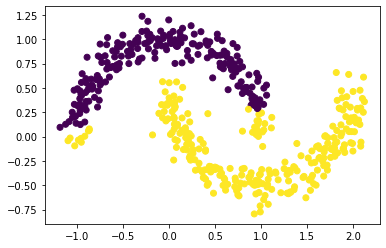

In [47]:
from matplotlib import pyplot as plt

plt.scatter(X[:,0],X[:,1],c=model.predict(X))

----

In [48]:
from sklearn.semi_supervised import SelfTrainingClassifier

target_partial = target.copy()
target_partial[random_unlabeled_points] = -1

model = SelfTrainingClassifier( SVC(probability=True, gamma='auto') ).fit(X,target_partial)

In [49]:
from sklearn.metrics import classification_report

o = model.predict(X)
print(classification_report(target,o))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       250
           1       0.93      0.98      0.96       250

    accuracy                           0.95       500
   macro avg       0.96      0.95      0.95       500
weighted avg       0.96      0.95      0.95       500



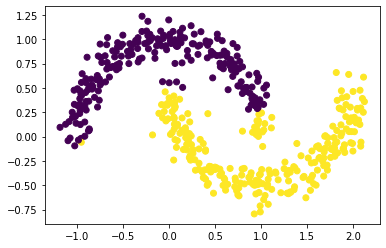

In [50]:
from matplotlib import pyplot as plt

plt.scatter(X[:,0],X[:,1],c=model.predict(X))